In [23]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt


In [24]:
(train_images, train_labels) , (test_images, test_labels) = datasets.cifar10.load_data()

In [25]:
train_images, test_images = train_images / 255.0, test_images / 255.0 

In [26]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'dear', 'dog', 'frog', 'horse', 'ship', 'truck']

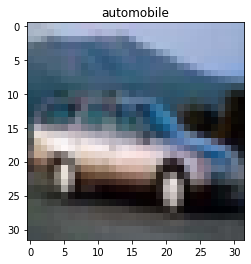

In [27]:
IMG_IDX = 4
plt.imshow(train_images[IMG_IDX], cmap=plt.cm.binary)
plt.title(class_names[train_labels[IMG_IDX][0]])
plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [32]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [33]:
history = model.fit(train_images, train_labels, epochs=4, validation_data=(test_images,test_labels))

Epoch 1/4
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5000 - accuracy: 0.4542 - val_loss: 1.2041 - val_accuracy: 0.5637
Epoch 2/4
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1292 - accuracy: 0.5987 - val_loss: 1.0650 - val_accuracy: 0.6272
Epoch 3/4
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9681 - accuracy: 0.6588 - val_loss: 0.9811 - val_accuracy: 0.6565
Epoch 4/4
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8712 - accuracy: 0.6928 - val_loss: 0.8760 - val_accuracy: 0.6947


In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_loss, test_acc

313/313 - 3s - loss: 0.8760 - accuracy: 0.6947


(0.8760091066360474, 0.6947000026702881)

In [35]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


In [36]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

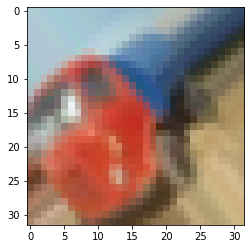

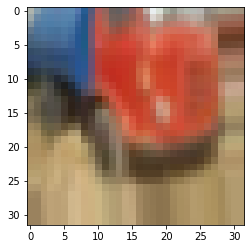

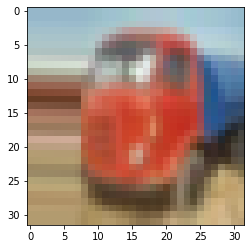

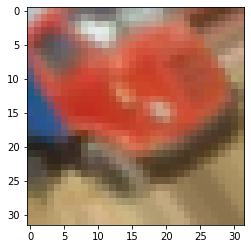

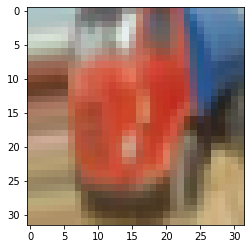

In [57]:
test_img = train_images[102]
img = image.img_to_array(test_img)
img = img.reshape((1,) +  img.shape)
i=0
for batch in datagen.flow(img, save_format='jpeg',save_prefix='test'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i+=1
  if i>4:
    break

plt.show()
